In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# CONFIDENCE INTERVALS

## EXERCISE 1.

What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [2]:
sample_size = 130
sample_mean = 98.25
sample_std = 0.73
confident_interval = 0.99
significance_level = 1 - confident_interval 

**How to calculate confident interval lower and upper limit ?**

confident interval limit = sample mean ± ( reliability factor  x standart error mean)

In [3]:
# calculate standart error of mean

standart_error_mean = sample_std /  np.sqrt(sample_size)
print('Standart error of mean: ', standart_error_mean.round(3))

Standart error of mean:  0.064


In [4]:
# calculate reliability factor

reliability_factor = stats.norm.ppf(1-significance_level/2)   # two tail
print('Reliability factor:', reliability_factor.round(3))

Reliability factor: 2.576


In [5]:
# calculate margin error
# recap z(1 - 0.99 ) = 2.58 (two tail)

margin_error = reliability_factor  * standart_error_mean
print('Margin of error ', margin_error.round(3))

Margin of error  0.165


In [6]:
# calculate sample confident limits

lower_confidece_limit = sample_mean  - margin_error
upper_confidece_limit = sample_mean  + margin_error

print(f'The average body temperature of healthy people is between {lower_confidece_limit:.2f}°F and{upper_confidece_limit: .2f}°F.')

The average body temperature of healthy people is between 98.09°F and 98.41°F.


In [7]:
# let's doing with scipy.stats library

lower, upper = stats.norm.interval(confident_interval, sample_mean, standart_error_mean )
print(f'The average body temperature of healthy people is between {lower:.2f}°F and{upper: .2f}°F.')

The average body temperature of healthy people is between 98.09°F and 98.41°F.


## EXERCISE 2.

The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.

Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [8]:
sample_size = 500
sample_mean = 5.4
sample_std = 3.1

confident_interval = 0.95
significance_level = 1 - confident_interval 

In [9]:
# calculate standart error of mean

standart_error_mean = sample_std /  np.sqrt(sample_size)

print('Standart error of mean: ', standart_error_mean.round(3))

Standart error of mean:  0.139


In [10]:
# calculate reliability factorn

reliability_factor = stats.norm.ppf(1-significance_level/2)   # two tail
print('Reliability factor:', reliability_factor.round(3))

Reliability factor: 1.96


In [11]:
# calculate margin error 
# recap z(1 - 0.95 ) = 1.96 (two tail)

margin_error = reliability_factor  * standart_error_mean
print('Margin of error ', margin_error.round(3))

Margin of error  0.272


In [12]:
# calculate sample confident limits

lower_confidece_limit = sample_mean  - margin_error
upper_confidece_limit = sample_mean  + margin_error

print(f'The average length of stay for the patients at hospital is between {lower_confidece_limit:.2f} and{upper_confidece_limit: .2f} days.')

The average length of stay for the patients at hospital is between 5.13 and 5.67 days.


In [13]:
# let's doing with scipy.stats library

lower, upper = stats.norm.interval(confident_interval, sample_mean, standart_error_mean )
print(f'The average length of stay for the patients at hospital is between {lower:.2f} and{upper: .2f} days.')

The average length of stay for the patients at hospital is between 5.13 and 5.67 days.


# HYPOTHESIS TESTING

## EXERCISE 3.

The hourly wages in a particular industry are normally distributed with mean \\$13.20 and standard deviation \\$2.50. A company in this industry employs 40 workers, paying them an average of \\$12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [14]:
mean = 13.20
stardard_deviation = 2.50
sample_size = 40
sample_mean = 12.20 

write down hypothesis

**H0: µ = 13.20 (Company pays standard wages)**

**H1: µ < 13.20 (Company pays substandard wages)**

In [15]:
# known population standart deviation, sample size >=30, so choose z distribution

z_test = sample mean - mean / (stardard deviation / sample size^.5 )

In [16]:
# calculate z test statistic 

z_test = (sample_mean - mean) / ( stardard_deviation / np.sqrt(sample_size) )

print('Z test statistic: ', round(z_test, 2))

Z test statistic:  -2.53


P(z> -2.53) = 1 - stats.norm.cdf(t_test)

In [17]:
# calculate z reliability 

reliability_factor =  1 - stats.norm.cdf(z_test)
print('Reliability factor:', reliability_factor.round(3))

Reliability factor: 0.994


In [18]:
# calculate p value

pvalue = 1 - reliability_factor

In [19]:
significance_level = 0.01

if pvalue < significance_level:
    print(f'T-test:{z_test}, p-value:{pvalue}\n\
    \tThe mean differences between company and population are statistically significant at {round(significance_level, 2)} significance level.\
    \n\tCompany can be accused of substandard wages.\
    \n\tSo, we can reject H0 hypothesis.')
else:
    print(f'T-test:{z_test}, p-value:{pvalue}\n\
    \tThe mean differences between company and population {round(significance_level, 2)} significance level.\
    \n\tCompany can not be accused of substandard wages.\
    \n\tSo, fail to reject H0 hypothesis.')

T-test:-2.5298221281347035, p-value:0.005706018193000872
    	The mean differences between company and population are statistically significant at 0.01 significance level.    
	Company can be accused of substandard wages.    
	So, we can reject H0 hypothesis.


## EXERCISE 4.

Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

[Results for two type of soils](https://docs.google.com/spreadsheets/d/1f2odmgDboIVuSV-A5gmuC25ppqQ5g1OIIF4h5EOqUcI/edit?usp=sharing)

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [20]:
# load one of below required library to use read_html
# pip install lxml
# pip install html5lib
# pip install beautifulsoup4

In [21]:
# read google sheet document

soil = pd.read_html('https://docs.google.com/spreadsheets/d/1f2odmgDboIVuSV-A5gmuC25ppqQ5g1OIIF4h5EOqUcI/edit#gid=0')

In [22]:
soil

[    Unnamed: 0      A      B   C   D   E   F   G   H   I  ...   K   L   M   N  \
 0            1  Soil1  Soil2 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 1            2  1.442  1.364 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 2            3  1.943  1.878 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 3            4   1.11  1.337 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 4            5  1.912  1.828 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 ..         ...    ...    ...  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
 95          96    NaN    NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 96          97    NaN    NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 97          98    NaN    NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 98          99    NaN    NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 99         100    NaN    NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN   
 
      O   P   

In [23]:
type(soil)

list

In [24]:
# make web file in list into dataframe 

header_row = soil[0].iloc[0, 1:3]
header_row
soil = soil[0].iloc[1:36,1:3]

soil.rename(columns = header_row, inplace = True)
soil

,Soil1,Soil2
1,1.442,1.364
2,1.943,1.878
3,1.11,1.337
4,1.912,1.828
5,1.553,1.371
6,1.641,1.428
7,1.499,1.119
8,1.347,1.373
9,1.685,1.589
10,1.578,1.714


In [25]:
soil.shape

(35, 2)

In [26]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 1 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Soil1   30 non-null     object
 1   Soil2   35 non-null     object
dtypes: object(2)
memory usage: 692.0+ bytes


In [27]:
# convert features type for numerical processes

soil.Soil1 = soil.Soil1.astype(float)
soil.Soil2= soil.Soil2.astype(float)

In [28]:
# look into samples mean for comparison

soil.mean()

Soil1    1.691800
Soil2    1.417114
dtype: float64

write down hypothesis

**H0: µ1 = µ2 (the means of two soils with respect to shear strength are equal)**

**H1: µ1 ≠ µ2 (the means of two soils with respect to shear strength are not equal)**

Two independent samples, unknown population standart deviation, so choose independent samples T Test.

T test requirement: all samples have normal distribution and variances are same.

In [29]:
# check samples with Shapiro test for normal distribution
# define normalite function

def normalite(feature):     
    alpha = 0.05    
    ShapiroStatistic, pvalue = stats.shapiro(feature)
    if pvalue > alpha:
        print(f'{feature.name} feature Shapiro normalite statistic:{round(ShapiroStatistic, 2)}, p-value:{round(pvalue, 2)}\n\t{feature.name} feature has normal distribution.\n')
    else:
        print(f'{feature.name} feature hasnot normal distribution.') 
        
normalite(soil.Soil1[:30])
normalite(soil.Soil2)

Soil1 feature Shapiro normalite statistic:0.96, p-value:0.32
	Soil1 feature has normal distribution.

Soil2 feature Shapiro normalite statistic:0.97, p-value:0.4
	Soil2 feature has normal distribution.



In [30]:
# check samples with Levene's test for equality of variances
# Levene test does not use NaN observations, so range selection is done because cells with NaN data are in order

alpha = 0.05

leveneTest = stats.levene(soil.Soil1[:30], soil.Soil2 )

if leveneTest.pvalue > alpha:
    print(f'Levene Test:{leveneTest.statistic.round(3)}, p-value:{leveneTest.pvalue.round(3)}\n\tSamples have equality of variances.')
else:
    print('Samples donot have equality of variances')

Levene Test:0.315, p-value:0.577
	Samples have equality of variances.


In [31]:
# calculate independent two samples T-test

significance_level = 0.01

statistic,  pvalue = stats.ttest_ind(soil.Soil1[:30], soil.Soil2, equal_var = (leveneTest.pvalue > alpha))

if pvalue < significance_level:
    print(f'T-test:{statistic}, p-value:{pvalue}\n\
    \tThe mean differences among the soils with respect to shear strength are statistically significant at {round(significance_level, 2)} significance level.\
    \n\tSo, we can reject H0 hypothesis.')
else:
    print(f'T-test:{statistic}, p-value:{pvalue}\n\
    \tThe mean differences among the soils with respect to shear strength are not statistically significant at {round(significance_level, 2)} significance level.\
    \n\tSo, fail to reject H0 hypothesis.')

T-test:5.1681473319343345, p-value:2.59322873235282e-06
    	The mean differences among the soils with respect to shear strength are statistically significant at 0.01 significance level.    
	So, we can reject H0 hypothesis.


## EXERCISE 5.

The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  [2015 PISA Test Dataset](https://docs.google.com/spreadsheets/d/14rVnIUfEm3CuK9bSvS5253RHWzQhXOuNc0I-cCkgpR8/edit?usp=sharing)

1. Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).

2. Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [32]:
# read google sheet document

pisa = pd.read_html('https://docs.google.com/spreadsheets/d/14rVnIUfEm3CuK9bSvS5253RHWzQhXOuNc0I-cCkgpR8')

In [33]:
pisa

[    Unnamed: 0             A               B                       C  \
 0            1  Country Code  Continent_Code  internet_users_per_100   
 1            2           ALB              EU              63.2529327   
 2            3           ARE              AS                    90.5   
 3            4           ARG              SA             68.04306411   
 4            5           AUS              OC             84.56051935   
 ..         ...           ...             ...                     ...   
 95          96           NaN             NaN                     NaN   
 96          97           NaN             NaN                     NaN   
 97          98           NaN             NaN                     NaN   
 98          99           NaN             NaN                     NaN   
 99         100           NaN             NaN                     NaN   
 
            D         E         F   G   H   I  ...   Q   R   S   T   U   V   W  \
 0       Math   Reading   Science NaN Na

In [34]:
type(pisa)

list

In [35]:
# make web file in list into dataframe 

header_row = pisa[0].iloc[0, 1:7]
header_row
pisa = pisa[0].iloc[1:71,1:7]

pisa.rename(columns = header_row, inplace = True)

In [36]:
pisa.shape

(70, 6)

In [37]:
pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [38]:
pisa[pisa.Continent_Code.isnull()]

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
9,CAN,NaN,88.47,515.6474,526.6678,527.7047
14,CRI,NaN,59.76295014,400.2534,427.4875,419.608
19,DOM,NaN,54.21576634,327.702,357.7377,331.6388
46,MEX,NaN,57.43104299,408.0235,423.2765,415.7099
69,USA,NaN,74.55420245,469.6285,496.9351,496.2424


In [39]:
# Above all country3-digit code is from North America (NA)
# recode from NaN into NA

pisa.loc[pisa.Continent_Code.isnull(), 'Continent_Code'] = 'NA'

In [40]:
# check NA continents exist, or not

pisa[pisa.Continent_Code =='NA']

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
9,CAN,NA,88.47,515.6474,526.6678,527.7047
14,CRI,NA,59.76295014,400.2534,427.4875,419.608
19,DOM,NA,54.21576634,327.702,357.7377,331.6388
46,MEX,NA,57.43104299,408.0235,423.2765,415.7099
69,USA,NA,74.55420245,469.6285,496.9351,496.2424


In [41]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 1 to 70
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country Code            70 non-null     object
 1   Continent_Code          70 non-null     object
 2   internet_users_per_100  70 non-null     object
 3   Math                    70 non-null     object
 4   Reading                 70 non-null     object
 5   Science                 70 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [42]:
# convert feature type for numerical processes

pisa.internet_users_per_100 = pisa.internet_users_per_100.astype(float)
pisa.Math = pisa.Math.astype(float)
pisa.Reading = pisa.Reading.astype(float)
pisa.Science = pisa.Science.astype(float)

In [43]:
# Get descriptive statistics all numeric features

pisa.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [44]:
# Get descriptive statistics all numeric features for each continent group (AS, EU, AF, NA, SA, OC)

pisa.groupby('Continent_Code').describe().T

Continent_Code                        AF          AS          EU          NA  \
internet_users_per_100 count    2.000000   17.000000   37.000000    5.000000   
                       mean    43.359918   68.455613   77.274888   66.886792   
                       std      7.297226   21.086060   12.425773   14.364359   
                       min     38.200000   21.976068   53.744979   54.215766   
                       25%     40.779959   50.300000   68.632900   57.431043   
                       50%     43.359918   74.000000   76.184000   59.762950   
                       75%     45.939877   84.948353   87.479056   74.554202   
                       max     48.519836   92.884826   98.200000   88.470000   
Math                   count    2.000000   17.000000   37.000000    5.000000   
                       mean   363.212100  466.216647  477.981449  424.250960   
                       std      5.099513   64.356490   35.150403   71.717058   
                       min    359.606200  380.259000  371.311400  327.702000   
                       25%    361.409150  403.833200  464.040100  400.253400   
                       50%    363.212100  459.816000  489.728700  408.023500   
                       75%    365.015050  531.296100  503.722000  469.628500   
                       max    366.818000  564.189700  521.250600  515.647400   
Reading                count    2.000000   17.000000   37.000000    5.000000   
                       mean   355.457400  454.059682  476.164608  446.420920   
                       std      7.916909   57.048962   37.720545   66.614744   
                       min    349.859300  346.549000  351.741500  357.737700   
                       25%    352.658350  408.102200  452.514300  423.276500   
                       50%    355.457400  433.542300  487.250100  427.487500   
                       75%    358.256450  508.690500  499.814600  496.935100   
                       max    361.055500  535.100200  526.424700  526.667800   
Science                count    2.000000   17.000000   37.000000    5.000000   
                       mean   381.074250  467.945847  478.299381  438.180760   
                       std      7.536556   56.671371   34.450616   76.789918   
                       min    375.745100  386.485400  383.682400  331.638800   
                       25%    378.409675  417.611200  460.774900  415.709900   
                       50%    381.074250  456.483600  490.225000  419.608000   
                       75%    383.738825  523.277400  501.936900  496.242400   
                       max    386.403400  555.574700  534.193700  527.704700   

Continent_Code                        OC          SA  
internet_users_per_100 count    2.000000    7.000000  
                       mean    86.391704   60.180494  
                       std      2.589686    9.772455  
                       min     84.560519   40.900000  
                       25%     85.476112   57.116462  
                       50%     86.391704   64.289000  
                       75%     87.307296   66.321532  
                       max     88.222889   69.198471  
Math                   count    2.000000    7.000000  
                       mean   494.559750  402.887700  
                       std      0.938401   18.128894  
                       min    493.896200  377.069500  
                       25%    494.227975  388.102200  
                       50%    494.559750  409.033300  
                       75%    494.891525  417.617650  
                       max    495.223300  422.671400  
Reading                count    2.000000    7.000000  
                       mean   506.085650  425.359229  
                       std      4.504341   19.709688  
                       min    502.900600  397.541400  
                       25%    504.493125  416.126900  
                       50%    506.085650  425.303100  
                       75%    507.678175  431.922700  
                       max    509.27070

In [45]:
# get analysis features

EU = pisa.Math[pisa.Continent_Code == 'EU']
AS = pisa.Math[pisa.Continent_Code == 'AS']
EU_AS =  pisa[(pisa.Continent_Code == 'AS') | (pisa.Continent_Code == 'EU')]

In [46]:
# look into Europe and Asia total observation 

print('Europe total observation:', EU.shape[0])
print('Asia total observation:', AS.shape[0])

Europe total observation: 37
Asia total observation: 17


In [47]:
# look into Europe and Asia means for comparison

print('Europe average math score:', EU.mean().round(2))
print('Asia average math score:', AS.mean().round(2))

Europe average math score: 477.98
Asia average math score: 466.22



write down hypothesis

**H0: µ(EU) = µ(AS) (the math scores of European (EU) and Asian (AS) countries means are equal)**

**H1: µ(EU) ≠ µ(AS) (the math scores of European (EU) and Asian (AS) countries means are not equal)**

Two independent samples, unknown population standart deviation, so choose independent samples T Test.

T test requirement: all samples have normal distribution and variances are same.

Samples have normality and equal variances according to question's assumption.

In [48]:
# calculate independent two samples T-test

significance_level = 0.05

statistic,  pvalue = stats.ttest_ind(EU, AS, equal_var = True)

if pvalue < significance_level:
    print(f'T-test:{statistic}, p-value:{pvalue}\n\
    \tThe math score mean differences among European (EU) and Asian (AS) countries are statistically significant at {round(significance_level, 2)} significance level.\
    \n\tSo, we can reject H0 hypothesis.')
else:
    print(f'T-test:{statistic}, p-value:{pvalue}\n\
    \tThe math score mean differences among European (EU) and Asian (AS) countries are not statistically significant at {round(significance_level, 2)} significance level.\
    \n\tSo, fail to reject H0 hypothesis.')

T-test:0.870055317967983, p-value:0.38826888111307345
    	The math score mean differences among European (EU) and Asian (AS) countries are not statistically significant at 0.05 significance level.    
	So, fail to reject H0 hypothesis.


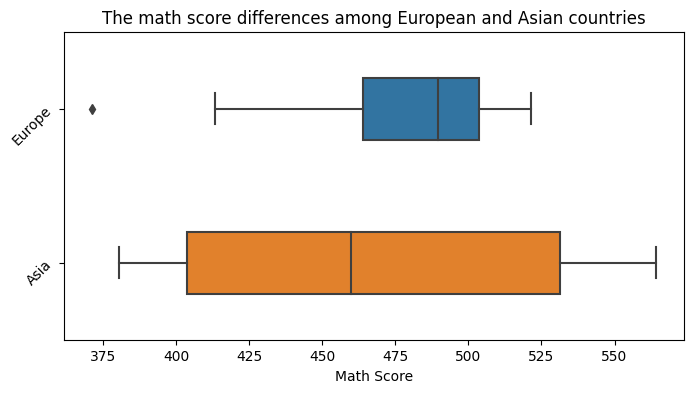

In [49]:
# drawing boxplot

fig, ax = plt.subplots(figsize=(8, 4))

ax = sns.boxplot(y = 'Continent_Code', x = 'Math', data = EU_AS, width = 0.4  )
ax.set_yticklabels(['Europe','Asia'], rotation=45)
ax.set_xlabel('Math Score')
ax.set_title('The math score differences among European and Asian countries')
plt.ylabel('')
plt.show()